
IBM HR Analytics Employee Attrition Modeling .
DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware. 
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. 
The organization would like to identify the factors which influence the attrition of employees.

Data Dictionary

* Age: Age of employee
* Attrition: Employee attrition status
* Department: Department of work
* DistanceFromHome
* Education: 1-Below College; 2- College; 3-Bachelor 4-Master; 5-Doctor;
* EducationField
* EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
* JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
* MaritalStatus
* MonthlyIncome
* NumCompaniesWorked: Number of companies worked prior to IBM
* WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
* YearsAtCompany: Current years of service in IBM

Analysis Task:
 *  Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
 * Exploratory data analysis

* Find the age distribution of employees in IBM
* Explore attrition by age
* Explore data for Left employees
* Find out the distribution of employees by the education field
* Give a bar chart for the number of married and unmarried employees

Build up a logistic regression model to predict which employees are likely to attrite.

# Importing libraries

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset and view the first 5 columns

In [275]:
df = pd.read_csv('datasets/project/IBM.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [292]:
# view the columns type
df.dtypes


Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

# Check the statistics of the dataset to check for any irregularities in the data distribution

* Note: the .describe() function will only work on the numerical columns 

* going through through the statistics, it is observed that there isn't any significant irregularity in the dataset

In [277]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


# check the data for missing values

* it is recorded that there are no missing values but we can't conculde yet because there are instances where the missing value might have been represented with a random figure. 

In [278]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

# Investigating further to check the unique values in each column

In [279]:
values = {}
for col in df.columns:
    values[col] = df[col].unique()
values

{'Age': array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
        24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
        58, 20, 25, 19, 57, 52, 47, 18, 60]),
 'Attrition': array(['Yes', 'No'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'DistanceFromHome': array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
        10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13]),
 'Education': array([2, 1, 4, 3, 5]),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'EnvironmentSatisfaction': array([2, 3, 4, 1]),
 'JobSatisfaction': array([4, 2, 3, 1]),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'MonthlyIncome': array([5993, 5130, 2090, ..., 9991, 5390, 4404]),
 'NumCompaniesWorked': array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3]),
 'WorkLifeBalance': array([1

In [304]:
# grouping people that attrited by marital status
df[['Attrition','MaritalStatus']].groupby('MaritalStatus').value_counts()

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
dtype: int64

In [305]:
# grouping people that attrited by job satisfaction
df[['Attrition','JobSatisfaction']].groupby('JobSatisfaction').value_counts()

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
dtype: int64

In [302]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Exploratory Data Analysis

* Now that we've confirmed that the data is clean if any error, let's visualize the correlation between the columns with seaborn heatmap


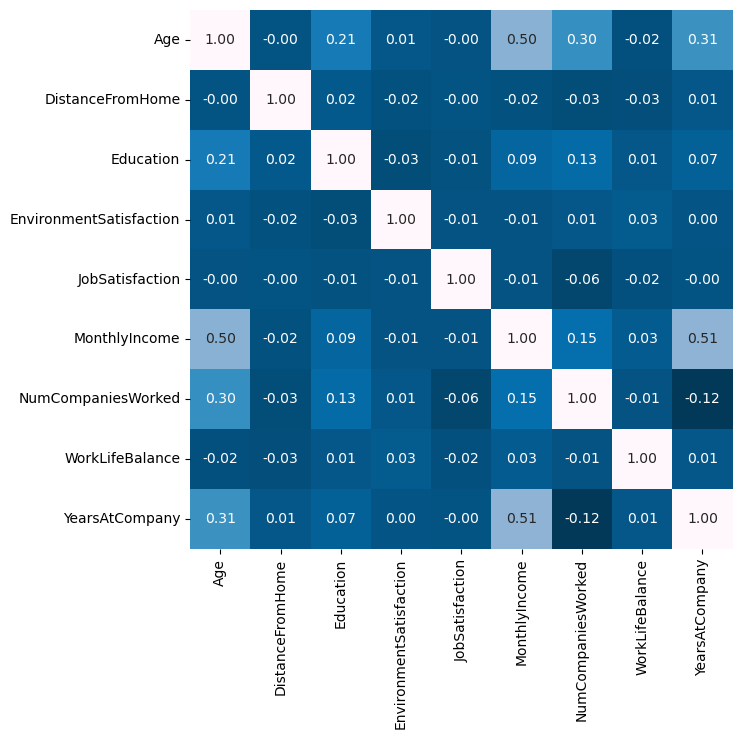

In [280]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cbar=False,cmap='PuBu_r')
plt.show()

# Positive correlation from high to low: 

* `Age` ; Monthly Income , YearsAtCompany , NumCompaniesWorked
* `DistanceFromHome` ; Education, YearsAtCompany
* `Education` ; Age, NumCompaniesWorked, Monthly Income , YearsAtCompany, DistanceFromHome
* `EnvironmentSatisfaction` ; WorkLifeBalance, Age, NumCompaniesWorked
* `Monthly Income` ; YearsAtCompany, Age, NumCompaniesWorked, Education, WorkLifeBalance
* `NumCompaniesWorked` ;  Age, Monthly Income , Education 
* `WorkLifeBalance` ;  Monthly Income , EnvironmentSatisfaction, Education, YearsAtCompany
* `YearsAtCompany` ; Monthly Income , Age , Education 


# Negative correlation from high to low: 

* `Age` ; WorkLifeBalance
* `DistanceFromHome` ; NumCompaniesWorked, WorkLifeBalance ,EnvironmentSatisfaction , Monthly Income
* `Education` ; EnvironmentSatisfaction
* `EnvironmentSatisfaction` ; Education, DistanceFromHome , JobSatisfaction, Monthly Income
* `JobSatisfaction` ; NumCompaniesWorked, WorkLifeBalance , Monthly Income, EnvironmentSatisfaction , Education
* `Monthly Income` ; DistanceFromHome, EnvironmentSatisfaction, JobSatisfaction
* `NumCompaniesWorked` ;  YearsAtCompany, JobSatisfaction , DistanceFromHome, WorkLifeBalance
* `WorkLifeBalance` ;  DistanceFromHome. Age , JobSatisfaction, NumCompaniesWorked
* `YearsAtCompany` ; NumCompaniesWorked

# Visualizing the age distribution of the employees 

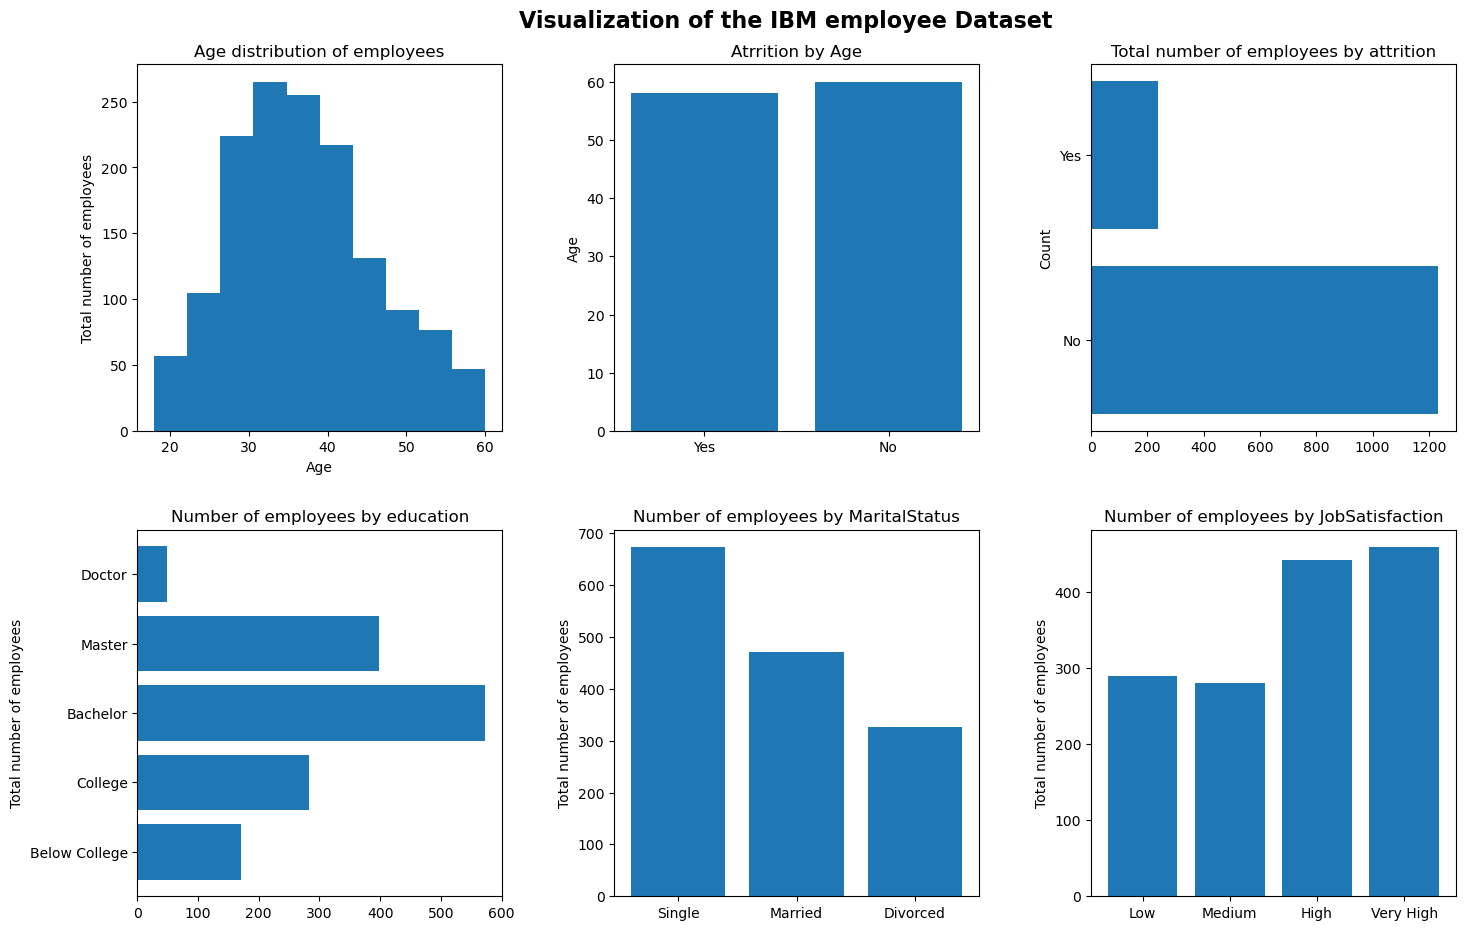

In [281]:
# set the figure
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
fig.tight_layout(pad=5.0)

# plot the data
ax1.hist(df['Age'])
ax2.bar(df['Attrition'],df['Age'])
ax3.barh(df['Attrition'].value_counts().index,df['Attrition'].value_counts())
ax4.barh(df['Education'].value_counts().index,df['Education'].value_counts())
ax5.bar(df['MaritalStatus'].value_counts().index,df['MaritalStatus'].value_counts())
ax6.bar(df['JobSatisfaction'].value_counts().index,df['JobSatisfaction'].value_counts())

# set the labels
ax1.set(title='Age distribution of employees',xlabel='Age',ylabel='Total number of employees')
ax2.set(title='Atrrition by Age',ylabel='Age')
ax3.set(title='Total number of employees by attrition',ylabel='Count')
ax4.set(title='Number of employees by education',ylabel='Total number of employees')
ax5.set(title='Number of employees by MaritalStatus',ylabel='Total number of employees')
ax6.set(title='Number of employees by JobSatisfaction',ylabel='Total number of employees')


# set the xticks
ax4.set_yticks(np.arange(1,6))
ax5.set_xticks(np.arange(3))
ax6.set_xticks(np.arange(1,5))

# set the xlabels
ax4.set_yticklabels(['Below College', 'College','Bachelor', 'Master','Doctor'])
ax5.set_xticklabels(['Single', 'Married', 'Divorced'])
ax6.set_xticklabels(['Low', 'Medium','High', 'Very High'])

fig.suptitle('Visualization of the IBM employee Dataset',fontsize=16,weight='bold');

# Now that we've finished the EDA on our data , it is time to get the data ready for machine learning

In [282]:
# importing ncessary libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix , classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Converting the attrition column which is our `Target` variable to numerical making `Yes = 1` and `No = 0` respectively  

In [283]:
def convert_column(value):
    if value == 'Yes':
        return 1
    else: 
        return 0
      
y = df['Attrition'].apply(convert_column)

In [284]:
# Before converting the column
df['Attrition'][:5] 

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [285]:
# After converting the column
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# Dealing with categorical values in the features using OneHotEncoder

In [286]:
features = ['Age','Department', 'DistanceFromHome', 'Education','EducationField','EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','WorkLifeBalance','YearsAtCompany']
X = df[features]

# define columns with categorical variables
categorical_columns = ['Department', 'EducationField', 'MaritalStatus']

# create the instance of OneHotEncoder
one_hot = OneHotEncoder(drop = 'if_binary')

# define the transformer
transformer = ColumnTransformer([('one_hot',one_hot,categorical_columns)],remainder='passthrough')

# fit and transform the data with the transformer
X_tranformed = transformer.fit_transform(X)

# Splitting the data into train and test splits and setting random seed to make the results are reproducible 

In [287]:
np.random.seed(50)
X_train, X_test, y_train, y_test = train_test_split(X_tranformed,y,test_size=0.2,random_state=50)

In [288]:
# check the shape and size of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 21), (294, 21), (1176,), (294,))

# Building the model and fitting on the train data to make prediction on the test data

In [289]:
model = LogisticRegression(max_iter=1000,random_state=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Train score : ', model.score(X_train, y_train))
print('Test score : ', model.score(X_test, y_test))

Train score :  0.8579931972789115
Test score :  0.8299319727891157


In [290]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

MSE:  0.17006802721088435
Accuracy:  0.8299319727891157
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       241
           1       0.71      0.09      0.17        53

    accuracy                           0.83       294
   macro avg       0.77      0.54      0.54       294
weighted avg       0.81      0.83      0.77       294



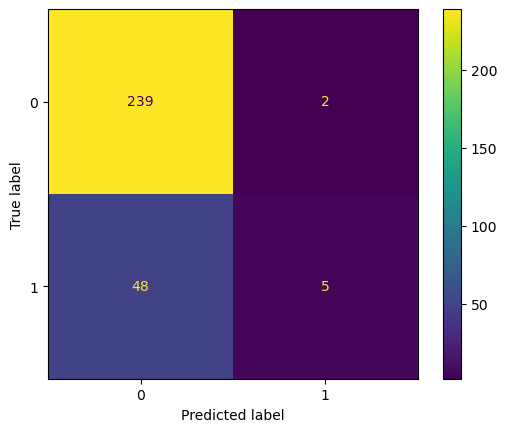

In [291]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

Observations:
# 1)	Larger percentage of the employees are between 30 t0 50 years of age
# 2)	A total number of 237 employees were attrited out of which 33 were Divorced,84 were Married and 120 are single.
# 3)	Employees who have a high job satisfaction were attrited the most followed by employees who have a low job satisfaction.
